In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('headbrain.csv')

In [3]:
dataset.shape

(237, 4)

In [4]:
dataset.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [6]:
X = dataset['Head Size(cm^3)'].values
y = dataset['Brain Weight(grams)'].values

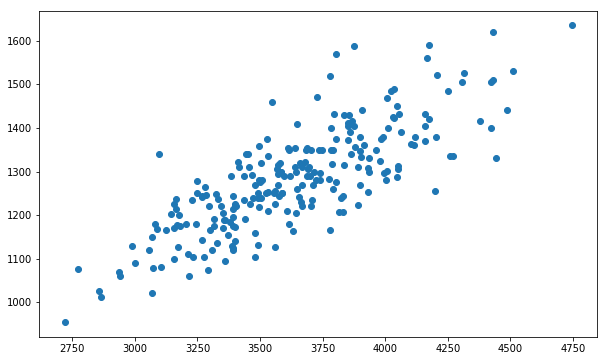

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)

In [9]:
numer = 0
denom = 0

mean_x = np.mean(X)
mean_y = np.mean(y)

for i in range(len(y)):
    numer += (X[i] - mean_x) * (y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2

slope = numer / denom
intercept = mean_y - slope * mean_x
print(slope, intercept)

0.26342933948939945 325.57342104944223


In [10]:
from scipy.stats import linregress

In [11]:
linregress(X,y)

LinregressResult(slope=0.2634293394893994, intercept=325.57342104944235, rvalue=0.7995697092542962, pvalue=5.957630839406541e-54, stderr=0.012907433440886988)

In [12]:
predictions = []
for i in range(len(y)):
    y_pred = slope * X[i] + intercept
    predictions.append(y_pred)

In [14]:
for i in range(10):
    err = predictions[i] - y[i]
    print("Actual :",y[i], "Predicted :",predictions[i],"Error :",err)

Actual : 1530 Predicted : 1514.1666008256125 Error : -15.833399174387523
Actual : 1297 Predicted : 1310.2722920608173 Error : 13.272292060817335
Actual : 1335 Predicted : 1448.0458366137732 Error : 113.04583661377319
Actual : 1282 Predicted : 1320.546036300904 Error : 38.54603630090401
Actual : 1590 Predicted : 1425.9177720966638 Error : -164.08222790333616
Actual : 1300 Predicted : 1269.9676031189392 Error : -30.032396881060777
Actual : 1400 Predicted : 1322.6534710168191 Error : -77.34652898318086
Actual : 1255 Predicted : 1263.118440292215 Error : 8.118440292214927
Actual : 1355 Predicted : 1277.3436246246424 Error : -77.65637537535758
Actual : 1375 Predicted : 1374.549050896231 Error : -0.4509491037690623


In [15]:
err = 0
n = len(y)
for i in range(len(y)):
    err += (predictions[i] - y[i]) ** 2

# Mean Squared Error
mse = err/n
print(mse)

5201.38402800233


In [16]:
# Root Mean Squared Error
rmse = np.sqrt(mse)
print(rmse)

72.1206213783709


In [17]:
from sklearn.preprocessing import StandardScaler